<font size="12">Computational Physics: Week 1 </font>

## Exercise 1: Bayes' Theorem Example: Monty Hall Problem (or "Deal Or No Deal") <a class="anchor" id="five"></a>

**1.1 Simulate it:**

In [ ]:
import random
import numpy as np
import scipy


In [ ]:
doors = np.array([1,2,3])
car = random.choice(doors)
goats = np.delete(doors, np.where(doors == car))
conservative = random.choice(doors)

print('The conservative choosed door number ' +str(conservative))

open_door = np.delete(goats, np.where(random.choice(goats)==goats)) if conservative == car else np.delete(goats, np.where(conservative==goats))

print('Monty opened door number ' + str(open_door) + ' there is a goat behind this door.')

doors = np.delete(doors, np.where(doors == open_door))

print('You won a car!!') if conservative == car else print('You won a goat!!')


The conservative choosed door number 3
Monty opened door number [1] there is a goat behind this door.
You won a car!!


In [ ]:
doors = np.array([1,2,3])
car = random.choice(doors)
goats = np.delete(doors, np.where(doors == car))
#print('The car is behind door number ' + str(car))
#print('The goats is behind doors number '+ str(goats))

switcher = random.choice(doors)
print('The switcher choose door number ' +str(switcher))
open_door = np.delete(goats, np.where(random.choice(goats)==goats)) if switcher == car else np.delete(goats, np.where(switcher==goats))
doors = np.delete(doors, np.where(doors == open_door))
print('Monty opened door number ' + str(open_door) + ' there is a goat behind this door.')
newcomer = random.choice(doors)
print('The newcomer choose door number ' +str(newcomer))
switcher = doors[np.where(doors!=switcher)]
print('The switcher changes the door to door number '  +str(switcher))

The switcher choose door number 2
Monty opened door number [1] there is a goat behind this door.
The newcomer choose door number 2
The switcher changes the door to door number [3]


In [ ]:
print('The switcher won a car!!') if switcher == car else print('The switcher won a goat!!')
print('The newcomer won a car!!') if newcomer == car else print('The newcomer won a goat!!')

The switcher won a car!!
The newcomer won a goat!!


In [ ]:
conservative_win_car = 0
switcher_win_car = 0
newcomer_win_car = 0
num=1000

for i in range(num):
  doors = np.array([1,2,3])
  car = random.choice(doors)
  goats = np.delete(doors, np.where(doors == car))
  switcher = random.choice(doors)
  open_door = np.delete(goats, np.where(random.choice(goats)==goats)) if switcher == car else np.delete(goats, np.where(switcher==goats))
  doors = np.delete(doors, np.where(doors == open_door))
  newcomer = random.choice(doors)
  switcher = doors[np.where(doors!=switcher)]
  if switcher == car:
    switcher_win_car +=1
  if newcomer == car:
    newcomer_win_car +=1

for i in range(num):
  doors = np.array([1,2,3])
  car = random.choice(doors)
  goats = np.delete(doors, np.where(doors == car))
  conservative = random.choice(doors)
  open_door = np.delete(goats, np.where(random.choice(goats)==goats)) if conservative == car else np.delete(goats, np.where(conservative==goats))
  doors = np.delete(doors, np.where(doors == open_door))
  if conservative==car:
    conservative_win_car+=1


print('The switcher won a car ' +str(switcher_win_car/num*100) +'% of the times.')
print('The newcomer won a car ' +str(newcomer_win_car/num*100) +'% of the times.')
print('The conservative won a car ' +str(conservative_win_car/num*100) +'% of the times.')


The switcher won a car 64.9% of the times.
The newcomer won a car 47.199999999999996% of the times.
The conservative won a car 32.9% of the times.



**1.2 Explain your results using Bayes' Theorem.**

Bayes Theorem describes probabilities related to an event, given another event occurs.

$$P(A|B)=\frac{P(B|A)P(A)}{P(B)} $$

In our problem we have 3 event: $A,B,C$ - the name of the doors.

Assuming the car is behind door $C$, Monty wouldn't open this door. We only need to calculate tow posteriors:

$P(door=A|opens=B)$, the probability $A$ is correct if Monty opened $B$.

$P(door=C|opens=B)$, the probability $C$ is correct if Monty opened $B$.

The probability of any door being correct before we pick a door is 1/3.  So the prior of any door being correct is $P(A)=\frac{1}{3}$.

If the car is actually behind door A, then Monty can open door B or C. So the probability of opening either is 1/2.

If the car is actually behind door C then monty can only open door B. He cannot open A, the door we picked. He also cannot open door C because it has the car behind it.

$$P(opens=B|door=A)=\frac{1}{2}$$
$$P(opens=B|door=C) = 1$$

$$P(door=A) \times P(opens=B|door=A) = \frac{1}{3}\times \frac{1}{2} = \frac{1}{6}$$
$$P(door=C) \times P(opens=B|door=C) = \frac{1}{3}\times 1 = \frac{1}{3}$$

In cases where analyzed events cover all possible options and don’t overlap, we can take the sum of the numerators:

$$P(B)=\frac{1}{6}+\frac{1}{3}=\frac{1}{2}$$

Now we can get the probabilities of winning in the cases of changing the door and not:

$$P(door=A|opens=B)=\frac{\frac{1}{6}}{\frac{1}{2}}=\frac{1}{3}$$
$$P(door=C|opens=B)=\frac{\frac{1}{3}}{\frac{1}{2}}=\frac{2}{3}$$

This leaves us with a with a higher probability of winning if we change doors after Monty opens a door.

If a new player join the game after Monty opens the door it is obvious that the probability to win is $P=\frac{1}{2}$.

**1.3 What would happen if you had 100 doors to choose from and the presenter opens 98 of them?**




## Exercise 2: Bayes' Theorem Example: Contingency Table  and COVID Tests

The probability that person has the disease if that person tested positive given by the expertion:

$$P(D=1|T=1)=\frac{P(T=1|D=1)P(D=1)}{P(T=1)}$$

where $P(T=1)$ can be calculated by the law of total probability:

$$P(T=1)=P(T=1|D=1)P(D=1)+P(T=1|D=0)P(D=0)=(1-\epsilon_{FN})\cdot\epsilon_D+\epsilon_{FP}⋅(1-\epsilon_D)$$

$$P(D=1|T=1)=\frac{(1-\epsilon_{FN})\cdot\epsilon_D}{(1-\epsilon_{FN})\cdot\epsilon_D+\epsilon_{FP}⋅(1-\epsilon_D)}$$

Substituting $\epsilon_D=0.01$, $\epsilon_{FP}=0.02$ and $\epsilon_{FN}=0.001$ we can get the probability that person has the disease if that person tested positive: $P(D=1|T=1)=33.5$%.

# Exercise 3: PDF of the log: continue example of transformation of variables in class

In [ ]:
import matplotlib.pyplot as plt
import statistics as stat

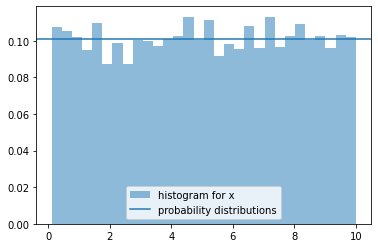

In [ ]:
N=10000
x = np.random.uniform(0.1,10,N)
plt.hist(x,bins=30, alpha=0.5, histtype='stepfilled', density=True, label='histogram for x')
plt.axhline(1/(10-0.1),label='probability distributions')
plt.legend(loc='lower center')
plt.show()

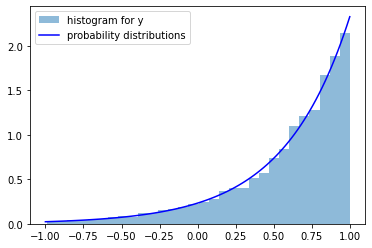

In [ ]:
y = np.log10(x)
plt.hist(y,bins=30, histtype='stepfilled', alpha=0.5, density=True, label='histogram for y')
y1 = np.linspace(-1,1,100)
plt.plot(y1, 10**y1*np.log(10)/9.9, color='b', label='probability distributions')
plt.legend()
plt.show()

In [ ]:
meanx = np.log10(stat.mean(x))
meany = stat.mean(y)
print('The log of the mean of x is ' +str(round(meanx,3)) + ' while the mean of y is ' +str(round(meany,3)))

medx = np.log10(stat.median(x))
medy = stat.median(y)
print('The log of the median of x is ' +str(round(medx,3)) + ' the median of y is ' +str(round(medy,3))+ ' ,the same number!')

The log of the mean of x is 0.705 while the mean of y is 0.586
The log of the median of x is 0.705 the median of y is 0.705 ,the same number!


# Exercise 4: A gaussian integral

In this exercise we have a little problem. How the computer can deal ∞ limit? First we need to make some manipulations on our function.

We can define a new variable $y=\exp(-\frac{x^2}{2\sigma^2})$ wich converges at intinity.

$$dy=-\frac{x}{\sigma^2}\exp(-\frac{x^2}{2\sigma^2})dx$$

$$x^2=-2\sigma^2\ln(y)$$

Now we can write the same integral as:

$$\int_0^∞x^3\exp(-\frac{x^2}{2\sigma^2})dx=\int_0^12\sigma^2\ln(y)dy$$

Now we can calculate this integral using Monte Carlo integral:

In [ ]:
sigma = 5
xmin=1
xmax=0
N = [10**3,10**4,10**5,10**6,10**7]

result=2*sigma**4

def f(x):
  return 2*sigma**4*np.log(x)

convergence = []

for ni in N:
  xi = np.random.uniform(xmin,xmax, ni)
  integral = (xmax-xmin) * np.mean(f(xi))
  convergence.append(abs(integral-result))

print(convergence)

[17.831595881037174, 8.665283130215812, 2.4936654606490265, 0.7656764264486355, 0.28919794836861]


In [ ]:
N = 10**6
dist = np.empty(1000)
for i in range(1000):
  xi = np.random.uniform(xmin,xmax, N)
  dist[i] = (xmax-xmin) * np.mean(f(xi))


In [ ]:
def normal(x):
  return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-result)**2/(2*sigma**2))

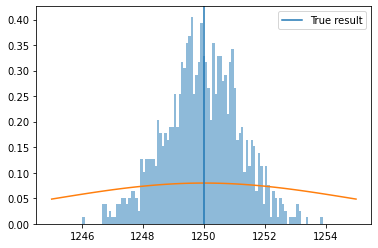

In [ ]:
x = np.linspace(1245,1255,100)
plt.hist(dist,bins=100, histtype='stepfilled', alpha=0.5, density=True)
plt.plot(x, normal(x))
plt.axvline(result, label='True result')
plt.legend()
plt.show()

Another way to solve this problen (probably the one you wanted from us to solve) is by separating the function $g(x)=0.5\sqrt{2\pi\sigma^2}x^3$ from the normal distribution function, where the half factor comes from the fact that we sum only on the positive values in the integral. Doing the same calculation as above in the second way:

In [ ]:
g = lambda x: 0.5*np.sqrt(2*np.pi*sigma**2)*x**3

N = [10**3,10**4,10**5,10**6,10**7]
convergence = []

for ni in N:
  xi = np.random.normal(0, sigma, ni)
  integral =  np.mean(abs(g(xi)))
  convergence.append(abs(integral-result))

print(convergence)


[35.72351382514762, 33.289541380800074, 9.891021770355792, 0.4841028053674563, 0.45582232770084374]


In [ ]:
N = 10**6
dist = np.empty(1000)
for i in range(1000):
  xi = np.random.normal(0, sigma, N)
  dist[i] = np.mean(abs(g(xi)))

In [ ]:
x = np.linspace(1240,1260,100)
plt.hist(dist,bins=100, histtype='stepfilled', alpha=0.5, density=False)
plt.plot(x, normal(x))
plt.axvline(result, label='True result')
plt.legend()
plt.show()

NameError: ignored

It is clear that by the second calculation the distribution function is closer to a normal distribution. It possible I have a mistake with the normaliztion factor, but this is the best I got.


# Exercise 5: Kicking horses

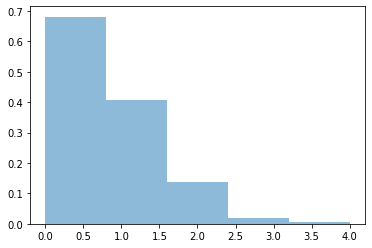

In [ ]:
deaths = [0,1,2,3,4]
groups = [109,65,22,3,1]

data=[]
for d,g in zip(deaths,groups):
  data += g*[d]

x = np.linspace(0,4,100)
plt.hist(data, bins=5, alpha=0.5, density=True)
plt.show()


In [ ]:
print(stat.mean(data))
print(stat.variance(data))

0.61
0.6109547738693468


We can see that the mean and the variance are the same, so we can assume the distribution is a Poisson distribution with $λ=0.61$.

#Exercise 6: Play with popular probability distributions

In [ ]:
from scipy.stats import norm

In [ ]:
!pip install astroML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 KB 4.1 MB/s eta 0:00:00


/usr/local/lib/python3.9/dist-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


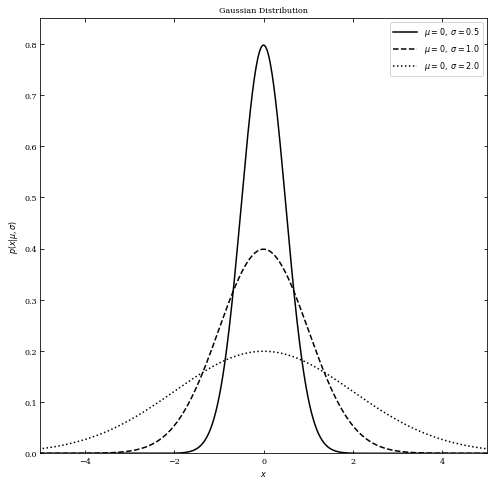

In [ ]:
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)
sigma_values = [0.5, 1.0, 2.0]
linestyles = ['-', '--', ':']
mu = 0
x = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots(figsize=(8,8))

for sigma, ls in zip(sigma_values, linestyles):
    # create a gaussian / normal distribution
    dist = norm(mu, sigma)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\mu=%i,\ \sigma=%.1f$' % (mu, sigma))

plt.xlim(-5, 5)
plt.ylim(0, 0.85)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')

plt.legend()
plt.show()

In [ ]:
distG = norm(loc =100 , scale=15) # Normal distribution with mean = 100, stdev = 15
draws = distG.rvs(10) # 10 random draws
p = distG.pdf(0) # pdf evaluated at x=0

print(draws)
print(p)

[ 86.54927791 104.91027579 117.59487125  55.25176064  93.11182438
  95.42775189  93.0609068   88.77511784 133.81274843  81.66105442]
5.940600124901435e-12


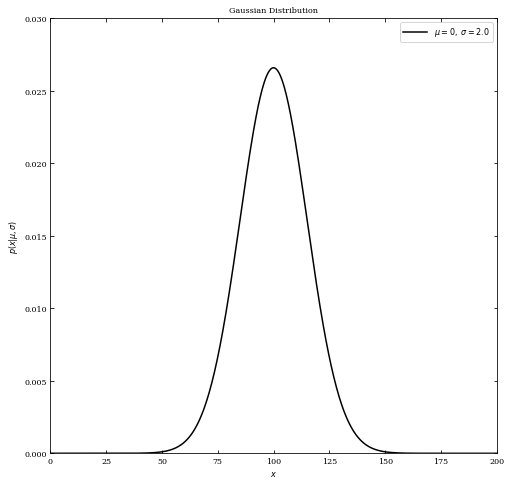

In [ ]:
xgrid = np.linspace(-100,200,1000) # generate distribution for a uniform grid of x values
gaussPDF = distG.pdf(xgrid)  # this is a function of xgrid

# actual plotting
fig, ax = plt.subplots(figsize=(8,8))

# Python3 f strings are awesome!
plt.plot(xgrid, gaussPDF, ls='-', c='black',
         label=f'$\mu={mu},\ \sigma={sigma}$')
plt.xlim(0, 200)
plt.ylim(0, 0.03)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend();

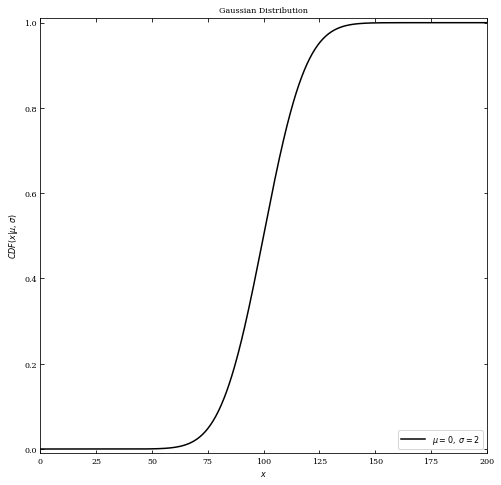

In [ ]:
# The same as above but now with the cdf method
gaussCDF = distG.cdf(xgrid)
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(xgrid, gaussCDF, ls='-', c='black',
         label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))
plt.xlim(0, 200)
plt.ylim(-0.01, 1.01)
plt.xlabel('$x$')
plt.ylabel(r'$CDF(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend(loc=4)

In [ ]:

upper = distG.cdf(100+15)
lower = distG.cdf(100-15)
p = upper-lower
print(p)

0.6826894921370859


**Exercise 6.1:**



In [ ]:
upper = distG.cdf(100+2*15)
lower = distG.cdf(100-2*15)
p = upper-lower
print('The probability enclosed between  −2σ  and  +4σ is ' +str(round(p*100)) +'%.')

The probability enclosed between  −2σ  and  +4σ is 95%.


In [ ]:
# Execute this cell
x = norm(0,1) # mean = 0, stdev = 1
y = np.exp(x.rvs(100))

print(y.mean())
print(x)

1.7797429363499406


In [ ]:
distLN = norm(0,1) # mean = 0, stdev = 1
x = distLN.rvs(10000)
y = np.exp(x)

print(np.exp(0 + 0.5*1), y.mean())

1.6487212707001282 1.677476457318138


In [ ]:
from scipy.stats import chi2

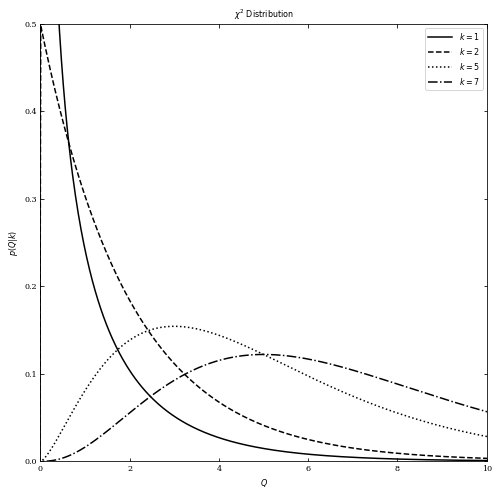

In [ ]:
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)
k_values = [1, 2, 5, 7]
linestyles = ['-', '--', ':', '-.']
mu = 0
x = np.linspace(-1, 20, 1000)
k_values = [1, 2, 5, 7]
linestyles = ['-', '--', ':', '-.']
mu = 0
x = np.linspace(-1, 20, 1000)

fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.12)

for k, ls in zip(k_values, linestyles):
    dist = chi2(k, mu)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$k=%i$' % k)

plt.xlim(0, 10)
plt.ylim(0, 0.5)

plt.xlabel('$Q$')
plt.ylabel(r'$p(Q|k)$')
plt.title(r'$\chi^2\ \mathrm{Distribution}$')

plt.legend()
plt.show()

In [ ]:

from scipy.stats import poisson

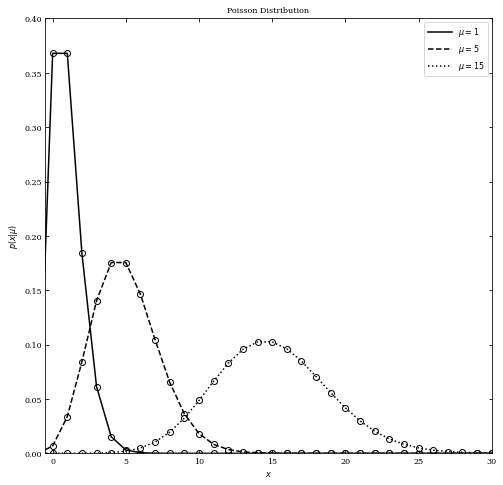

In [ ]:
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)
mu_values = [1, 5, 15]
linestyles = ['-', '--', ':']
fig, ax = plt.subplots(figsize=(8,8))

for mu, ls in zip(mu_values, linestyles):
    # create a poisson distribution
    # we could generate a random sample from this distribution using, e.g.
    #   rand = dist.rvs(1000)
    dist = poisson(mu)
    x = np.arange(-1, 200)

    plt.plot(x, dist.pmf(x), color='black',
             linestyle=ls,
             label=r'$\mu=%i$' % mu)

    plt.scatter(x, dist.pmf(x), edgecolor='black',facecolor='white')

plt.xlim(-0.5, 30)
plt.ylim(0, 0.4)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu)$')
plt.title('Poisson Distribution')

plt.legend()
plt.show()

In [ ]:
from scipy.stats import t as student_t

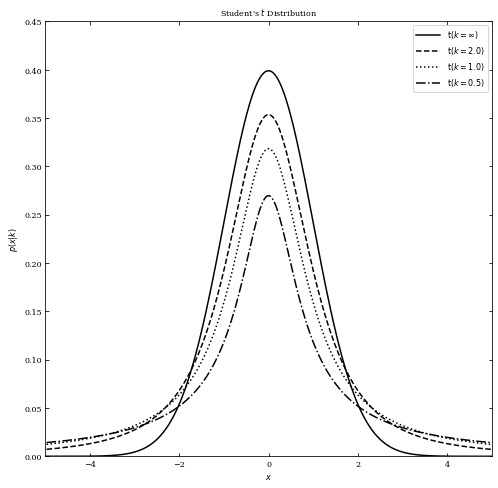

In [ ]:
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)
mu = 0
k_values = [1E10, 2, 1, 0.5]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots(figsize=(8,8))

for k, ls in zip(k_values, linestyles):
    dist = student_t(k, 0)

    if k >= 1E10:
        label = r'$\mathrm{t}(k=\infty)$'
    else:
        label = r'$\mathrm{t}(k=%.1f)$' % k

    plt.plot(x, dist.pdf(x), ls=ls, c='black', label=label)

plt.xlim(-5, 5)
plt.ylim(0.0, 0.45)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|k)$')
plt.title("Student's $t$ Distribution")

plt.legend()
plt.show()

### Cauchy Distribution

**Exercise 6.3:** Central Limit Theorem: explain why the Cauchy distribution is an exception. Simulate and demonstrate this.

The Cauchy distribution is an exception from the central limit theorem because the mean and variance of this distribution is not defined. The variance goes to infinity. The central limit theorm requires a finite variacne and mean value.

In [ ]:
from scipy.stats import cauchy


(-50.0, 50.0)

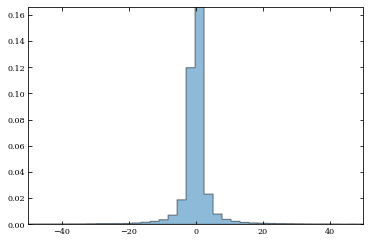

In [ ]:
x = np.random.standard_cauchy(100000)
plt.hist(x,bins=100000, alpha=0.5, histtype='stepfilled', density=True)
plt.xlim((-50,50))